In [8]:
using Pkg; Pkg.activate("."); 
using TSO
using PyPlot

  Activating environment at `/mnt/beegfs/gemini/groups/bergemann/users/eitner/model_grid/MUST.jl/examples/initial_models/Project.toml`


In [9]:
function get_cmap(binning; cmap="RdBu")
    min_c = minimum(binning)
    max_c = maximum(binning)
    d     = max_c - min_c + 1
    cmap  = plt.get_cmap(cmap, d)    # 11 discrete colors

    min_c, max_c, cmap
end

get_cmap (generic function with 1 method)

In [10]:

table_folder   = "/home/eitner/shared/TS_opacity_tables/TSO.jl/examples/converting_tables/TSO_MARCS_v0.5"

# TS quantities after post-processing
eos           = reload(SqEoS,     joinpath(table_folder, "combined_ross_eos.hdf5")) # ross for others
opacities     = reload(SqOpacity, joinpath(table_folder, "combined_opacities.hdf5"), mmap=true)
formOpacities = reload(SqOpacity, joinpath(table_folder, "combined_formation_opacities_t45g20m00.hdf5"), mmap=true)

# λ Integration weights
weights = ω_midpoint(opacities)

# Load a model for the transition between optically thin and thick regime
model = Average3D("/mnt/beegfs/gemini/groups/bergemann/users/eitner/model_grid/MUST.jl/examples/initial_models/t45g20m00_00000_av.dat")

bins_semistagger = StaggerBinning(TSO.SemiStaggerBins, 
                                opacities=opacities, 
                                formation_opacity=-log10.(formOpacities.κ_ross), κ_bins=3, Nbins=7)


bin  = binning(bins_semistagger, opacities, -log10.(formOpacities.κ_ross)) ;

bins = [2.9356434392929076 3.88156476855278 -0.4736124873161316 1.2882583141326904; 3.88156476855278 4.360984921455383 -0.4736124873161316 1.2882583141326904; 4.360984921455383 4.840405074357987 -0.4736124873161316 1.2882583141326904; 4.840405074357987 5.3244440507888795 -0.4736124873161316 1.2882583141326904; 2.9356434392929076 5.3244440507888795 1.2882583141326904 3.8049466609954834; 2.9356434392929076 5.3244440507888795 3.8049466609954834 7.304074287414551; 2.9356434392929076 5.3244440507888795 7.304074287414551 15.757104153633117]


┌ Info: All wavelength points sorted in to bins? true
└ @ TSO /home/eitner/shared/TS_opacity_tables/TSO.jl/src/_binning.jl:407


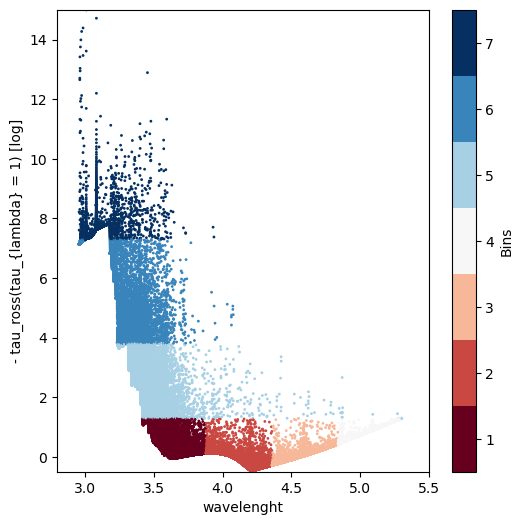

In [12]:
close()

min_c, max_c, cmap = get_cmap(bin)

f, ax = plt.subplots(1,1, figsize=(6,6))


#for i in axes(bins_beeck.bin_edges, 1)
#    b = bins_beeck.bin_edges[i, :]
#    ax.fill_between([b[1], b[2]], [b[3], b[3]], [b[4], b[4]], edgecolor="k")
#end


i = ax.scatter(log10.(opacities.λ), -log10.(formOpacities.κ_ross), c=bin, s=1, cmap=cmap, vmin=min_c-0.5, vmax=max_c+0.5)
c = plt.colorbar(i, ticks=collect(min_c:max_c), ax=ax)

ax.set_xlabel("wavelenght")
ax.set_ylabel("- tau_ross(tau_{lambda} = 1) [log]")
c.set_label("Bins")

ax.set_xlim(2.8,5.5)
ax.set_ylim(-0.5,15)

#f.savefig("binning_marcs.pdf", dpi=200)
gcf()

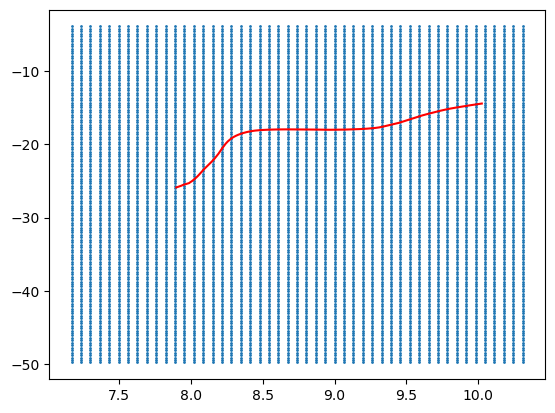

In [13]:
close()

tt, rr = meshgrid(eos.lnT, eos.lnRho)
plt.scatter(tt, rr, s=1)
plt.plot(model.lnT, model.lnρ, color="red")

gcf()